[Reference](https://medium.com/@koki_noda/learn-data-science-basics-with-s-p500-stock-data-7c9df01f8d61)

# Import Libraries and Set Some Variables


In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
data_dir = "./data/learn_datascience_basics_with_sp500"
os.makedirs(data_dir, exist_ok=True)

# Download Dataset


In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500_df = tables[0]
second_table = tables[1]
# sp500_df.to_csv(f"{data_dir}/SP500_20220506.csv", index=False)
# sp500_df = pd.read_csv(f"{data_dir}/SP500_20220506.csv")

# Exploratory Data Analysis


In [3]:
print(sp500_df.shape)

(504, 9)


In [4]:
sp500_df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [5]:
sp500_df.tail()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
499,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
502,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873
503,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952


In [6]:
sp500_df.sample()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
448,TJX,TJX Companies,reports,Consumer Discretionary,Apparel Retail,"Framingham, Massachusetts",1985-09-30,109198,1987


In [7]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 504 non-null    object
 1   Security               504 non-null    object
 2   SEC filings            504 non-null    object
 3   GICS Sector            504 non-null    object
 4   GICS Sub-Industry      504 non-null    object
 5   Headquarters Location  504 non-null    object
 6   Date first added       459 non-null    object
 7   CIK                    504 non-null    int64 
 8   Founded                504 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [8]:
sp500_df.nunique()

Symbol                   504
Security                 504
SEC filings                1
GICS Sector               11
GICS Sub-Industry        123
Headquarters Location    257
Date first added         353
CIK                      500
Founded                  196
dtype: int64

## CIK, Symbol and Security

In [9]:
duplicate_cik = sp500_df["CIK"].value_counts().head(4)
duplicate_cik

1754301    2
1652044    2
1564708    2
1336917    2
Name: CIK, dtype: int64

In [10]:
sp500_df[sp500_df["CIK"].isin(duplicate_cik.index)]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
24,GOOGL,Alphabet (Class A),reports,Communication Services,Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
25,GOOG,Alphabet (Class C),reports,Communication Services,Interactive Media & Services,"Mountain View, California",2006-04-03,1652044,1998
206,FOXA,Fox Corporation (Class A),reports,Communication Services,Movies & Entertainment,"New York City, New York",2013-07-01,1754301,2019
207,FOX,Fox Corporation (Class B),reports,Communication Services,Movies & Entertainment,"New York City, New York",2015-09-18,1754301,2019
335,NWSA,News Corp (Class A),reports,Communication Services,Publishing,"New York City, New York",2013-08-01,1564708,2013 (1980)
336,NWS,News Corp (Class B),reports,Communication Services,Publishing,"New York City, New York",2015-09-18,1564708,2013 (1980)
461,UAA,Under Armour (Class A),reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2014-05-01,1336917,1996
462,UA,Under Armour (Class C),reports,Consumer Discretionary,"Apparel, Accessories & Luxury Goods","Baltimore, Maryland",2016-04-08,1336917,1996


## GICS Sector


In [11]:
sector_counts = sp500_df["GICS Sector"].value_counts()
sector_counts

Information Technology    74
Industrials               73
Financials                66
Health Care               65
Consumer Discretionary    60
Consumer Staples          32
Real Estate               30
Utilities                 29
Materials                 28
Communication Services    26
Energy                    21
Name: GICS Sector, dtype: int64

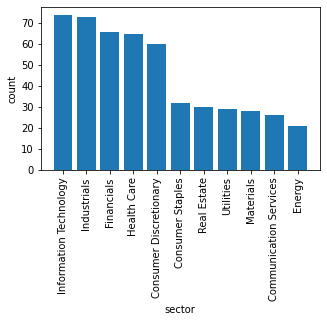

In [12]:
sectors = sector_counts.index
plt.figure(figsize=(5,3))
plt.bar(sectors, sector_counts)
plt.xticks(rotation=90)
plt.xlabel("sector")
plt.ylabel("count")
plt.show()

## GICS Sub-Industry


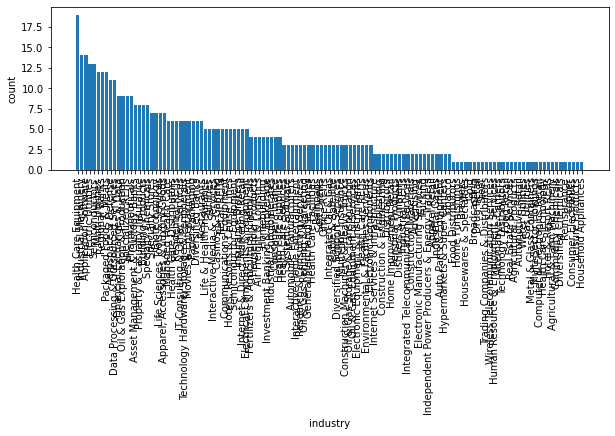

In [13]:
industry_counts = sp500_df["GICS Sub-Industry"].value_counts()
industries = industry_counts.index
plt.figure(figsize=(10,3))
plt.bar(industries, industry_counts)
plt.xticks(rotation=90)
plt.xlabel("industry")
plt.ylabel("count")
plt.show()

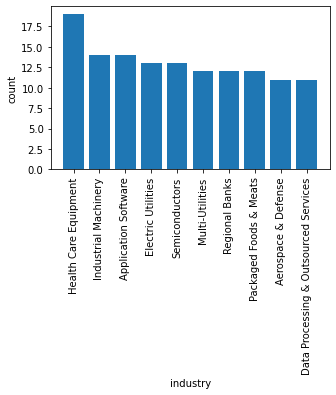

In [14]:
industry_counts_top10 = industry_counts.head(10)
industries_top10 = industry_counts_top10.index
plt.figure(figsize=(5,3))
plt.bar(industries_top10, industry_counts_top10)
plt.xticks(rotation=90)
plt.xlabel("industry")
plt.ylabel("count")
plt.show()

## Date first added


In [15]:
print("number of :", sp500_df["Date first added"].isna().sum())

number of : 45


In [16]:
date_first_added_noise = sp500_df[~sp500_df["Date first added"].fillna("").str.match('\d{4}\-(0?[1-9]|1[012])\-(0?[1-9]|[12][0-9]|3[01])')]
date_first_added_noise["Date first added"].value_counts(dropna=False)

NaN     45
2009     1
2005     1
Name: Date first added, dtype: int64

In [17]:
def extract_year(added_date):
    if re.match('\d{4}\-(0?[1-9]|1[012])\-(0?[1-9]|[12][0-9]|3[01])', added_date):
        return added_date.split("-")[0]
    return added_date
date_first_added = sp500_df[~sp500_df["Date first added"].isna()]["Date first added"].map(extract_year)
added_day_counts = date_first_added.value_counts().sort_index()
print("number of data:", added_day_counts.sum())

number of data: 459


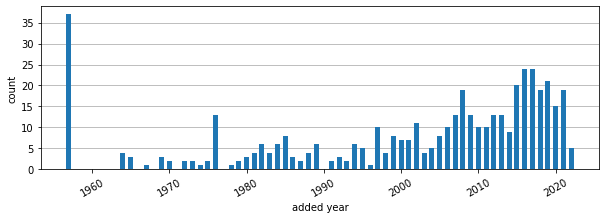

In [18]:
plt.figure(figsize=(10,3))
plt.bar(pd.to_datetime(added_day_counts.index), added_day_counts, width=13000/len(added_day_counts), zorder=2)
plt.xticks(rotation=30)
plt.grid(axis='y', zorder=1)
plt.xlabel("added year")
plt.ylabel("count")
plt.show()

## Founded

In [19]:
# noise
founded_noise = sp500_df[~sp500_df["Founded"].str.fullmatch('\d{4}')]
founded_noise["Founded"].value_counts()


1983 (1877)                           2
2013 (1980)                           2
2013 (1888)                           1
2005 (Molson 1786, Coors 1873)        1
2012 (1935)                           1
2004 (1865 / 1909)                    1
1928 (2011)                           1
1984 (1925)                           1
1881/1894 (1980)                      1
1994 (Northrop 1939, Grumman 1930)    1
2011 (1966)                           1
2020 (1853)                           1
2019 (1952)                           1
2008 (1847)                           1
2012 (1917)                           1
1998 (1981)                           1
2006 (1902)                           1
2009 (1887)                           1
1904/1946/1959                        1
2019 (1860)                           1
2016 (1950)                           1
2014 (1946)                           1
1982 (1919)                           1
1983 (1885)                           1
1998 (1923 / 1874)                    1


In [20]:
def clearn_founded(founded_year):
    return founded_year[:4]
    
founded_year = sp500_df["Founded"].map(clearn_founded)
founded_year_counts = founded_year.value_counts().sort_index()
print("number of data:", founded_year_counts.sum())

number of data: 504


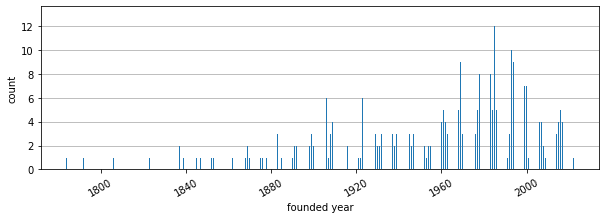

In [21]:
plt.figure(figsize=(10,3))
plt.bar(pd.to_datetime(founded_year_counts.index), founded_year_counts, width=13000/len(founded_year_counts), zorder=2)
plt.xticks(rotation=30)
plt.grid(axis='y', zorder=1)
plt.xlabel("founded year")
plt.ylabel("count")
plt.show()

## Headquarters Location


In [22]:
def extract_headquarter_states(location):
    location = location.split(",")[-1]
    location = re.sub("\[.*\]", "", location)
    return location
    
print("number of nan:", sp500_df["Headquarters Location"].isna().sum())
headquarters_states = sp500_df["Headquarters Location"].map(extract_headquarter_states)

number of nan: 0


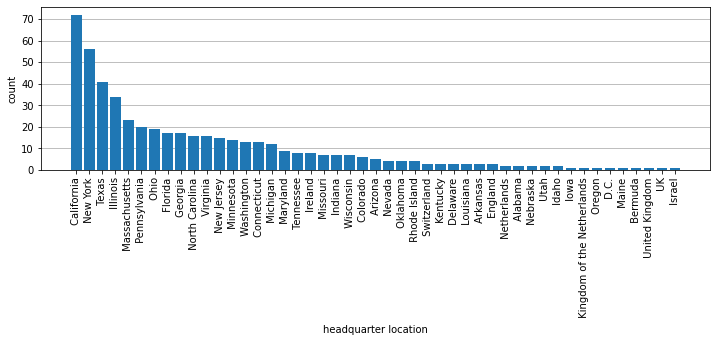

In [23]:
headquarters_states_counts = headquarters_states.value_counts()
plt.figure(figsize=(12,3))
plt.bar(headquarters_states_counts.index, headquarters_states_counts, zorder=2)
plt.grid(axis="y", zorder=1)
plt.xticks(rotation=90)
plt.xlabel("headquarter location")
plt.ylabel("count")
plt.show()

## SEC filings


In [24]:
sp500_df["SEC filings"].value_counts()

reports    504
Name: SEC filings, dtype: int64